<a href="https://colab.research.google.com/github/Nikunjbansal99/GenderPrediction/blob/main/GenderRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **About Data:**

**To analyze gender by voice and speech, a training database was required. A database was built using thousands of samples of male and female voices, each labeled by their gender of male or female. Voice samples were collected from the following resources:**

**The Harvard-Haskins Database of Regularly-Timed Speech Telecommunications & Signal Processing Laboratory (TSP) Speech Database at McGill University VoxForge Speech Corpus Festvox CMU_ARCTIC Speech Database at Carnegie Mellon University Each voice sample is stored as a.WAV file, which is then pre-processed for acoustic analysis using the specan function from the WarbleR R package. Specan measures 22 acoustic parameters on acoustic signals for which the start and end times are provided.**

**The output from the pre-processed WAV files were saved into a CSV file, containing 3168 rows and 21 columns (20 columns for each feature and one label column for the classification of male or female). You can download the pre-processed dataset in CSV format, using the link above.In order to analyze gender by voice and speech, a training database was required. A database was built using thousands of samples of male and female voices, each labeled by their gender of male or female.**



# **Methodology**


*   Importing Some Basic Libraries
*   Importing Data
*   Performing Descriptive Analysis on the dataset
    *   Data Description
    *   Checking null values
*   Processing Categorical Values using encoding
*   Analysis of Target Variable
    *   Plotting Kernel Density Estimate Plot
    *   Plotting Distance Plot
    *   Plotting Correlation Matrix and Heat Map
*   Select Features based on above analysis
*   Splitting voice_df into 70% and 30% to construct Training data and Testing data respectively
*   Optimizing Best Parameters for SVM Classifier
*   Applying Dimensionality reduction
*   Visualization
*   Creating Final SVM Classifier
    *   Perform Prediction on Training Data
    *   Perform Prediction on Testing Data
*   For Training data, Evaluating Model based on Confusion Matrix and Classification Report
*   For Testing data, Evaluating Model based on Confusion Matrix and Classification Report
*   Save predictions of Testing data in gender_pred.csv

# **Importing Some Basic Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import sys, os
from matplotlib import pyplot as plt
from sklearn.utils import resample
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import LabelEncoder
from itertools import product
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# **Importing Data**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
gender_data_dir = "/content/gdrive/My Drive/Task_10/"
voice_df = pd.read_excel(os.path.join(gender_data_dir, "voice.xlsx"))

In [ ]:
voice_df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


# **Descriptive Analysis of the dataset**

In [ ]:
print("Size of Gender Recognition dataset       : {}".format(voice_df.shape))

Size of Gender Recognition dataset       : (3168, 21)


## **Data Description**

In [ ]:
voice_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [ ]:
voice_df.describe().T

,count,mean,std,min,25%,50%,75%,max
meanfreq,3168.0,0.180907,0.029918,0.039363,0.163662,0.184838,0.199146,0.251124
sd,3168.0,0.057126,0.016652,0.018363,0.041954,0.059155,0.067020,0.115273
median,3168.0,0.185621,0.036360,0.010975,0.169593,0.190032,0.210618,0.261224
Q25,3168.0,0.140456,0.048680,0.000229,0.111087,0.140286,0.175939,0.247347
Q75,3168.0,0.224765,0.023639,0.042946,0.208747,0.225684,0.243660,0.273469
IQR,3168.0,0.084309,0.042783,0.014558,0.042560,0.094280,0.114175,0.252225
skew,3168.0,3.140168,4.240529,0.141735,1.649569,2.197101,2.931694,34.725453
kurt,3168.0,36.568461,134.928661,2.068455,5.669547,8.318463,13.648905,1309.612887
sp.ent,3168.0,0.895127,0.044980,0.738651,0.861811,0.901767,0.928713,0.981997
sfm,3168.0,0.408216,0.177521,0.036876,0.258041,0.396335,0.533676,0.842936


## **Checking NULL/NaN Values :**

In [ ]:
voice_df.isna().sum()                        # Printing a count of missing value w.r.t each feature in full_df

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

# **Analysis of Target Variable**

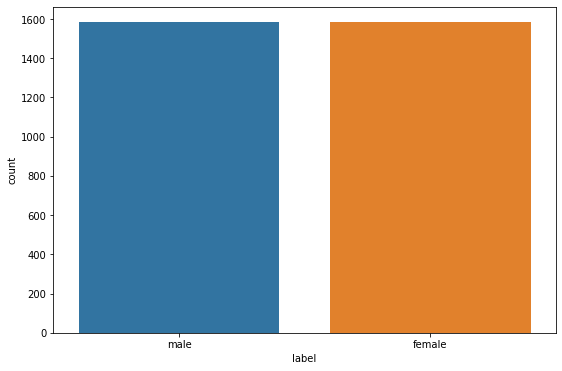

In [ ]:
plt.figure(figsize=(9,6))
sns.countplot(x='label', data=voice_df, order=["male", "female"] )

In [ ]:
voice_df['label'].value_counts()           # Prints the count of different classes in 'label'

male      1584
female    1584
Name: label, dtype: int64

**Hence, We found that our data is Balanced.**

## **Processing Categorical Values:**

In [ ]:
# creating instance of labelencoder
label_encode = LabelEncoder()

In [ ]:
# Perform Encoding by coverting 'label' feature into numerical form
voice_df['label'] = label_encode.fit_transform(voice_df['label'])

In [ ]:
voice_df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1


## **Kernel Density Estimate Plot :**

**It is analagous to a histogram. It represents the data using a continuous probability density curve.**

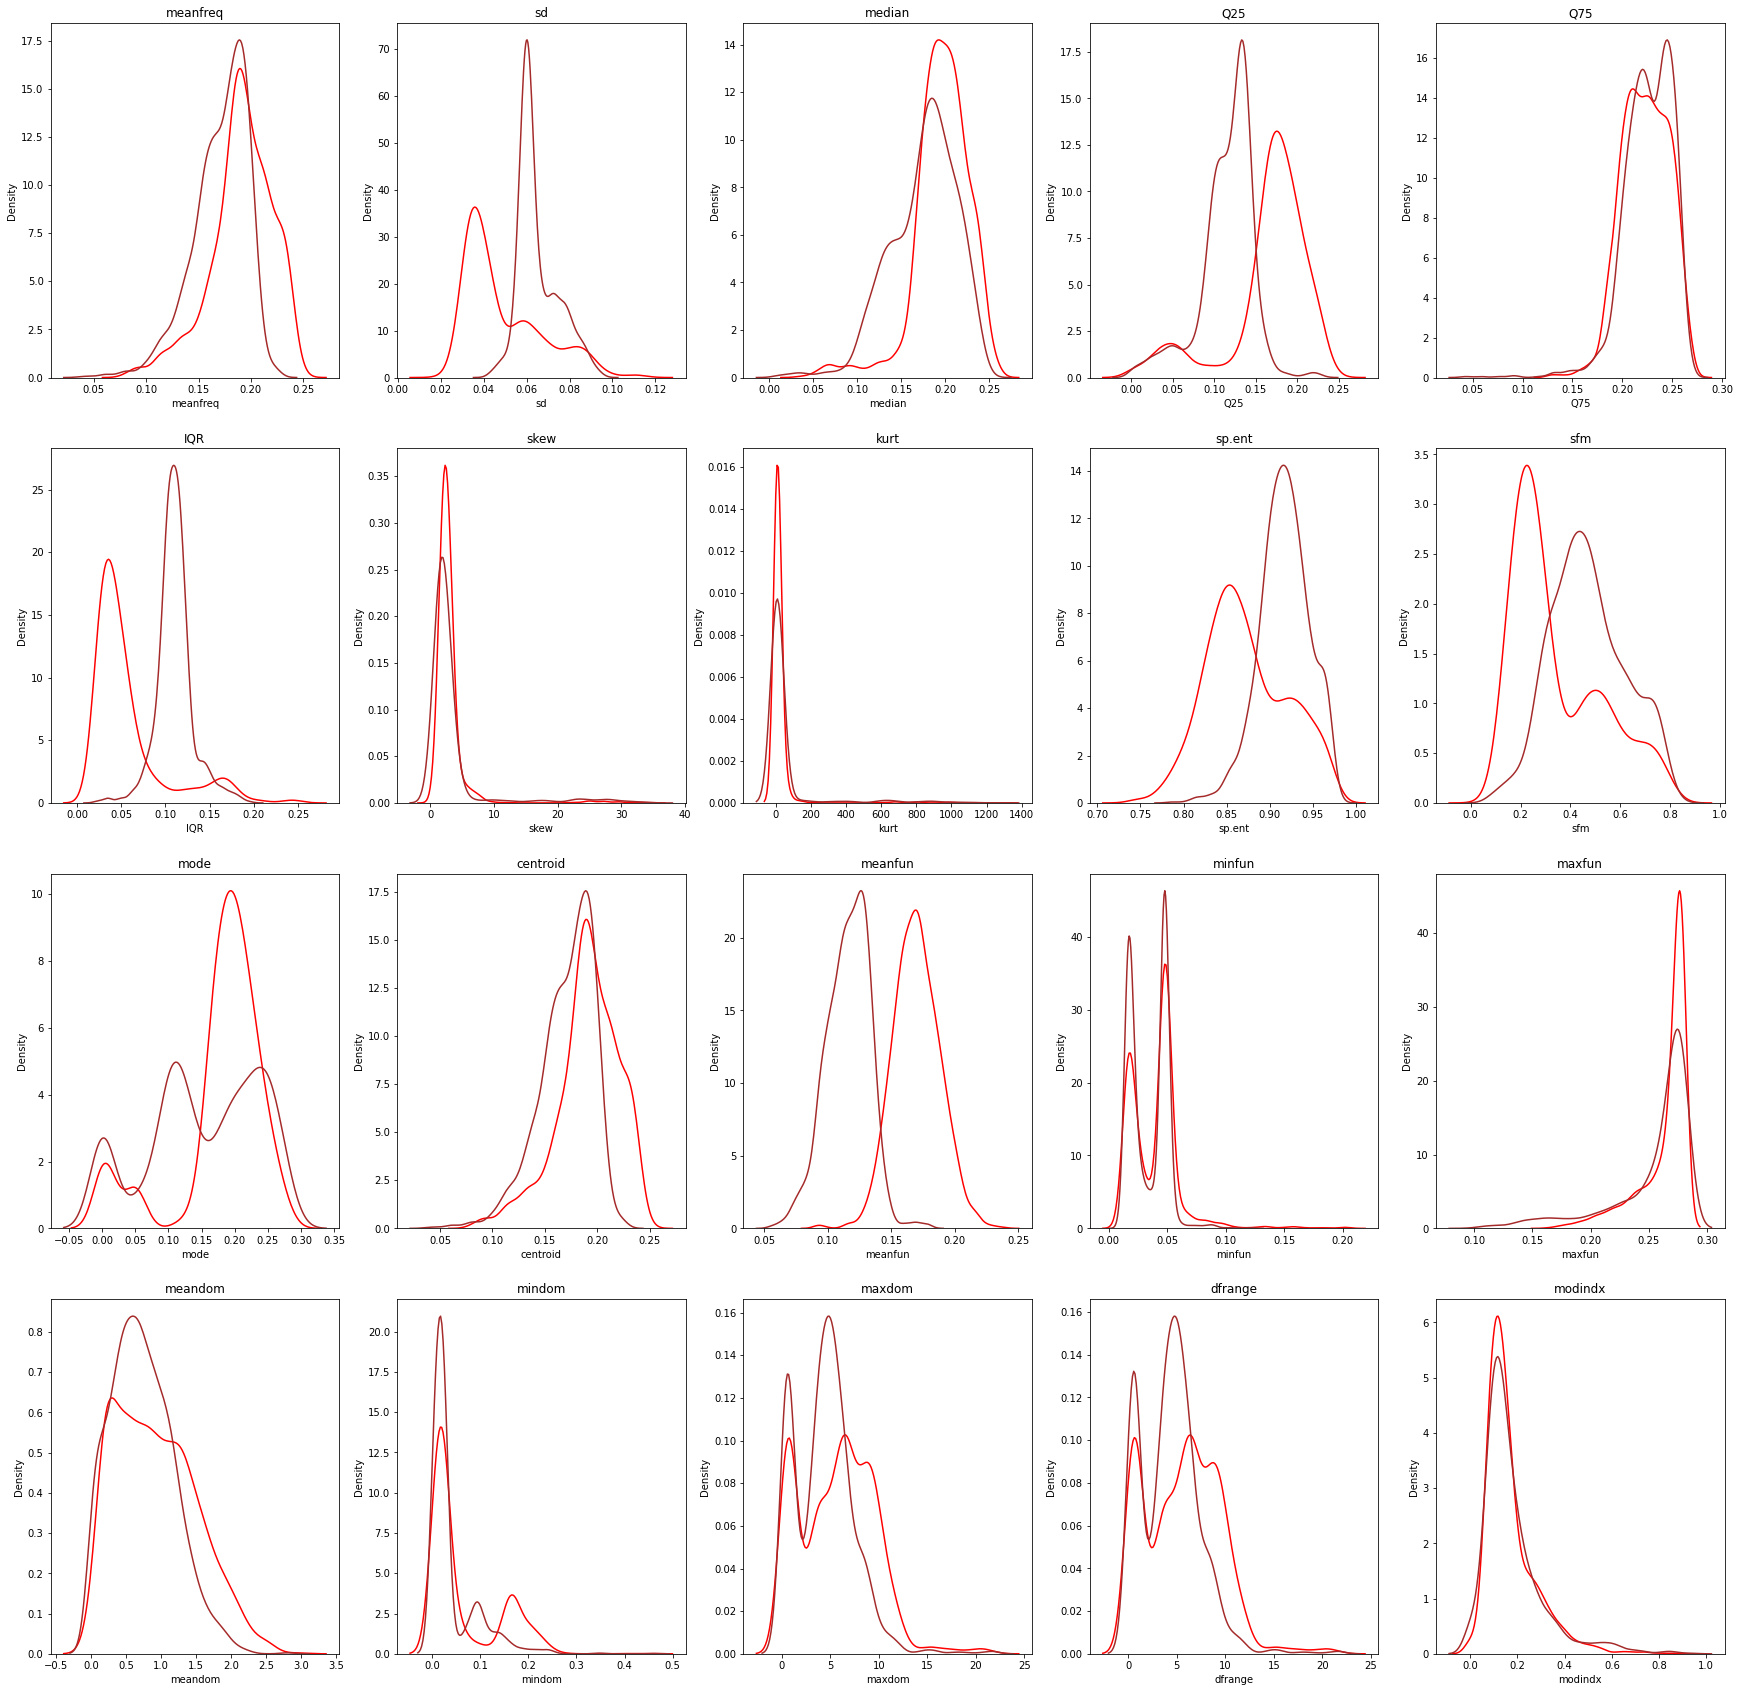

In [ ]:
plt.subplots(4,5,figsize=(30,30))
for i in range(1,21):
    plt.subplot(4,5,i)
    plt.title(voice_df.columns[i-1])
    sns.kdeplot(voice_df.loc[voice_df['label'] == 0, voice_df.columns[i-1]], color= 'red', label='female')
    sns.kdeplot(voice_df.loc[voice_df['label'] == 1, voice_df.columns[i-1]], color= 'brown', label='male')

**Hence, it is clearly visible that Q25, IQR and meanfun features will play an important role while classification. Since, they can classify Male and Female more effectively.**

## **Distance Plot :**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

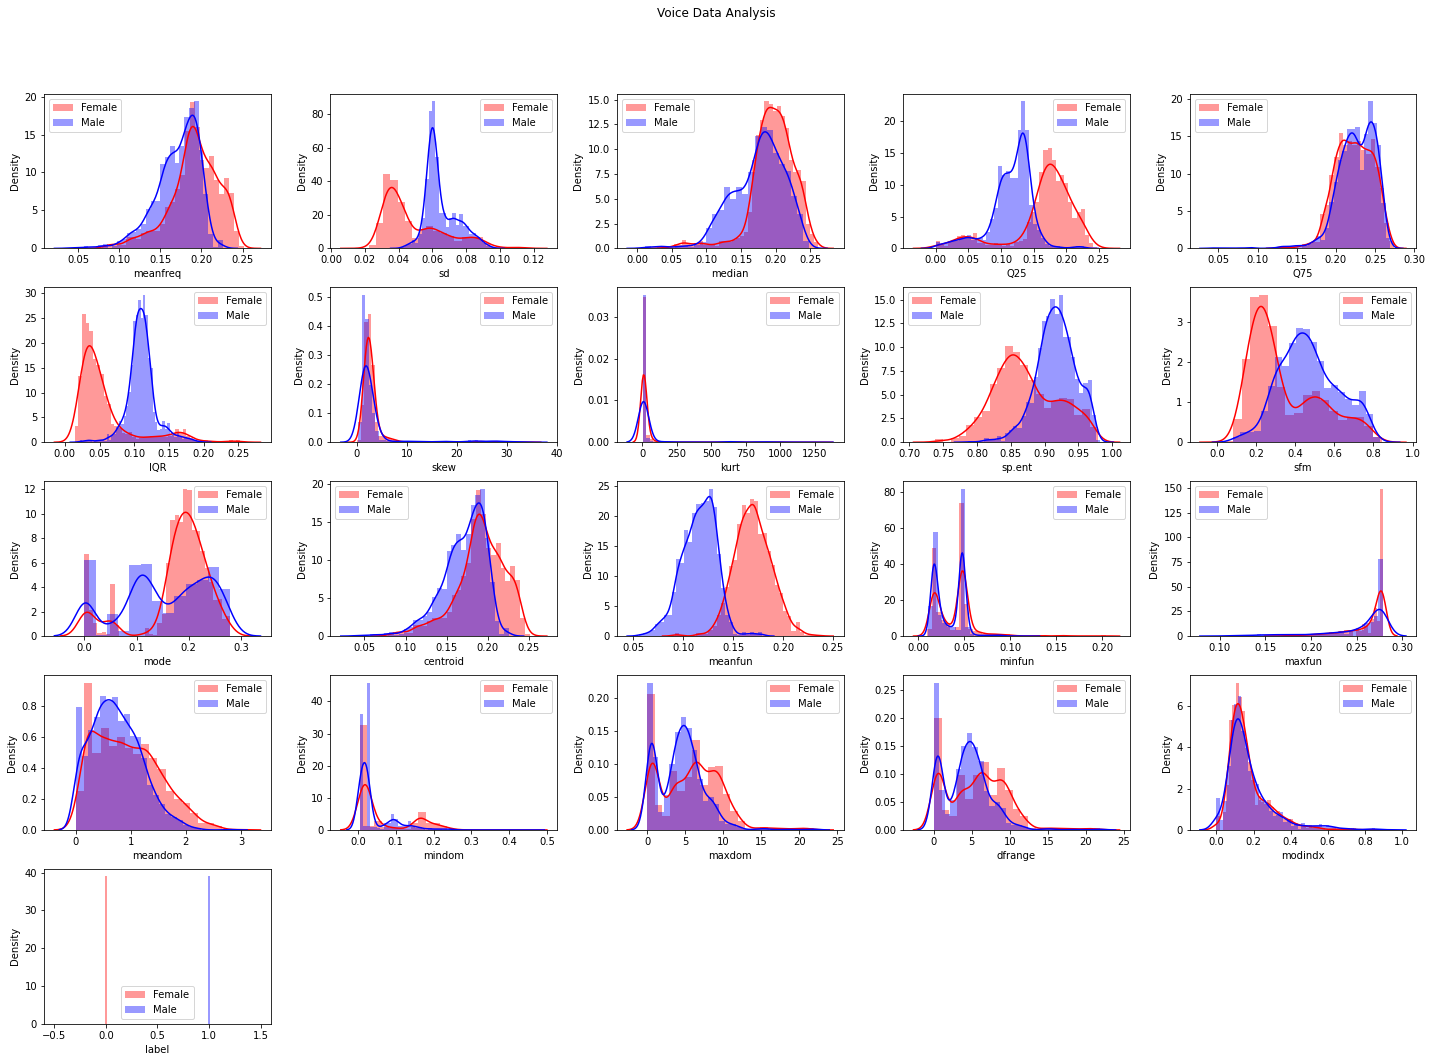

In [ ]:
fig = plt.figure(figsize = (20, 15))
j = 0
for i in voice_df.columns:
    plt.subplot(5, 5, j+1)
    j += 1
    sns.distplot(voice_df[i][voice_df['label']==0], color='r', label = 'Female')
    sns.distplot(voice_df[i][voice_df['label']==1], color='b', label = 'Male')
    plt.legend(loc='best')
fig.suptitle('Voice Data Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.show()

**Hence, it is clearly visible that Q25, IQR and meanfun features will play an important role while classification. Since, they can classify Male and Female more effectively.**

## **Correlation Matrix and Heat Map**

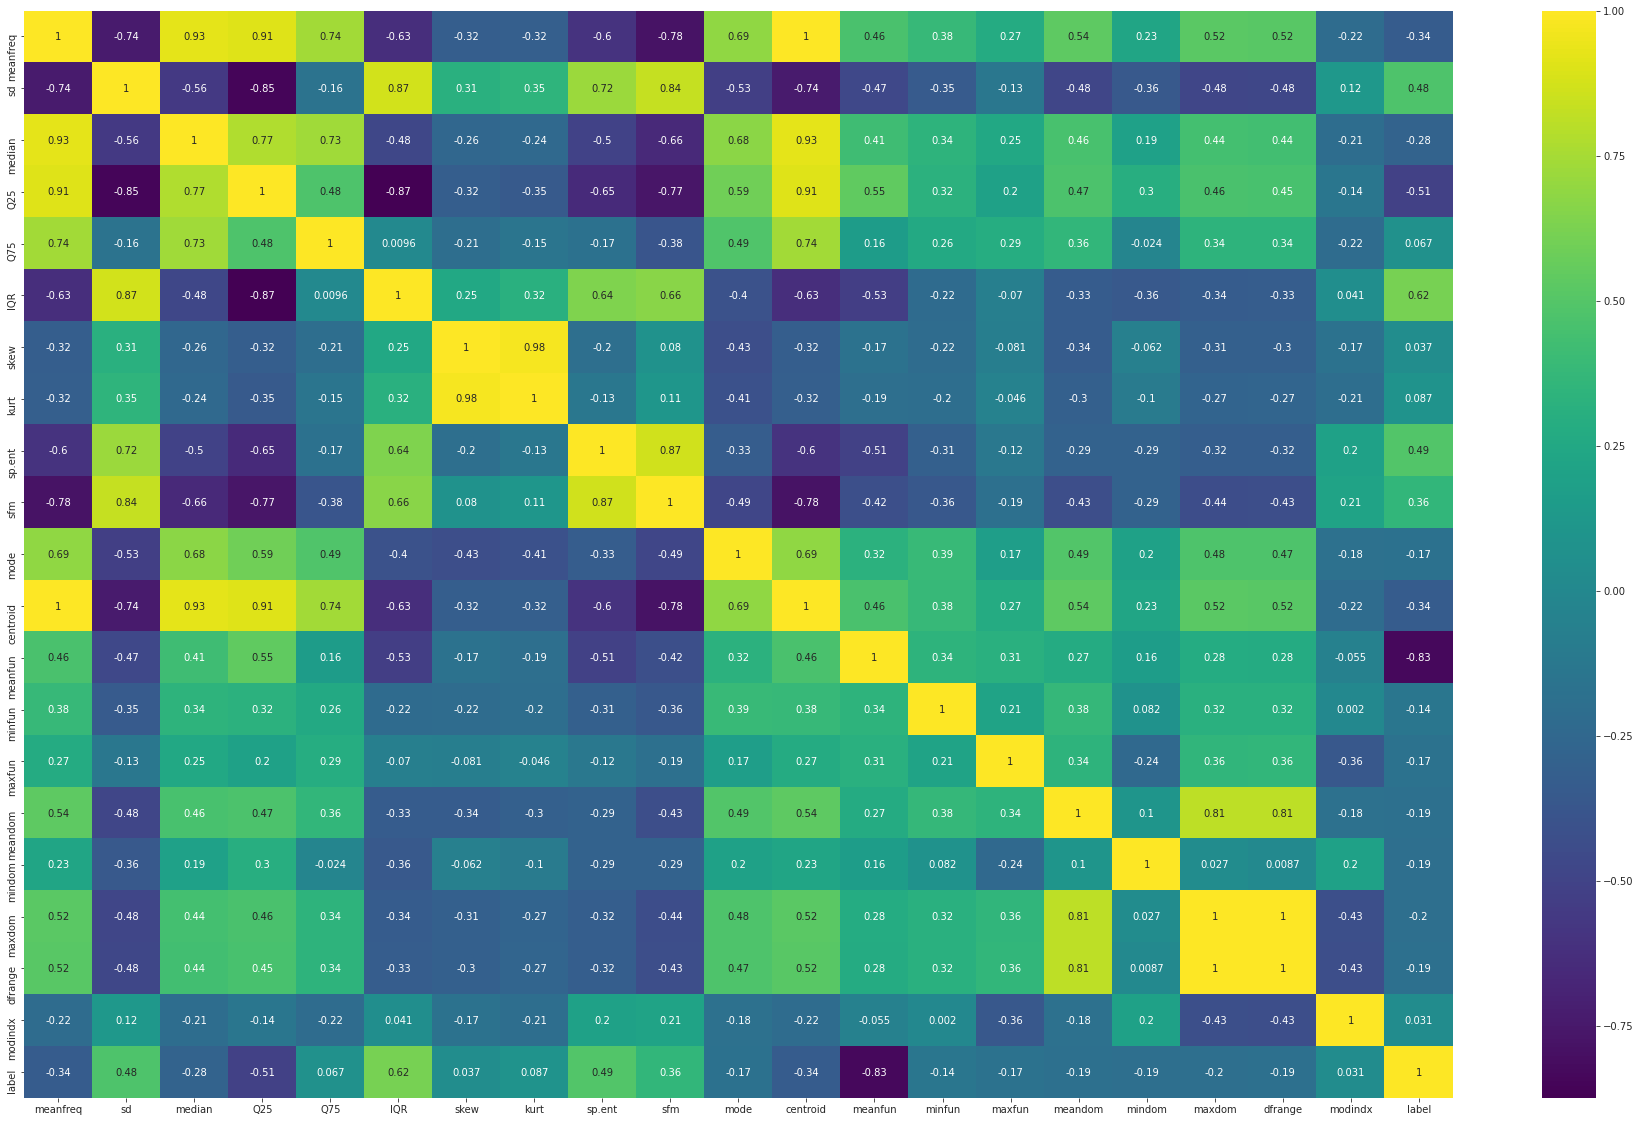

In [ ]:
corr_data = voice_df.corr()                              # calculating correlation data between features
plt.figure(figsize=(32, 20))                            # setting figure size
sns.set_style('ticks')                                  # setting plot style
sns.heatmap(corr_data, cmap='viridis',annot=True)       # plotting heatmap using sns library
plt.show()

Text(0, 0.5, 'Features')

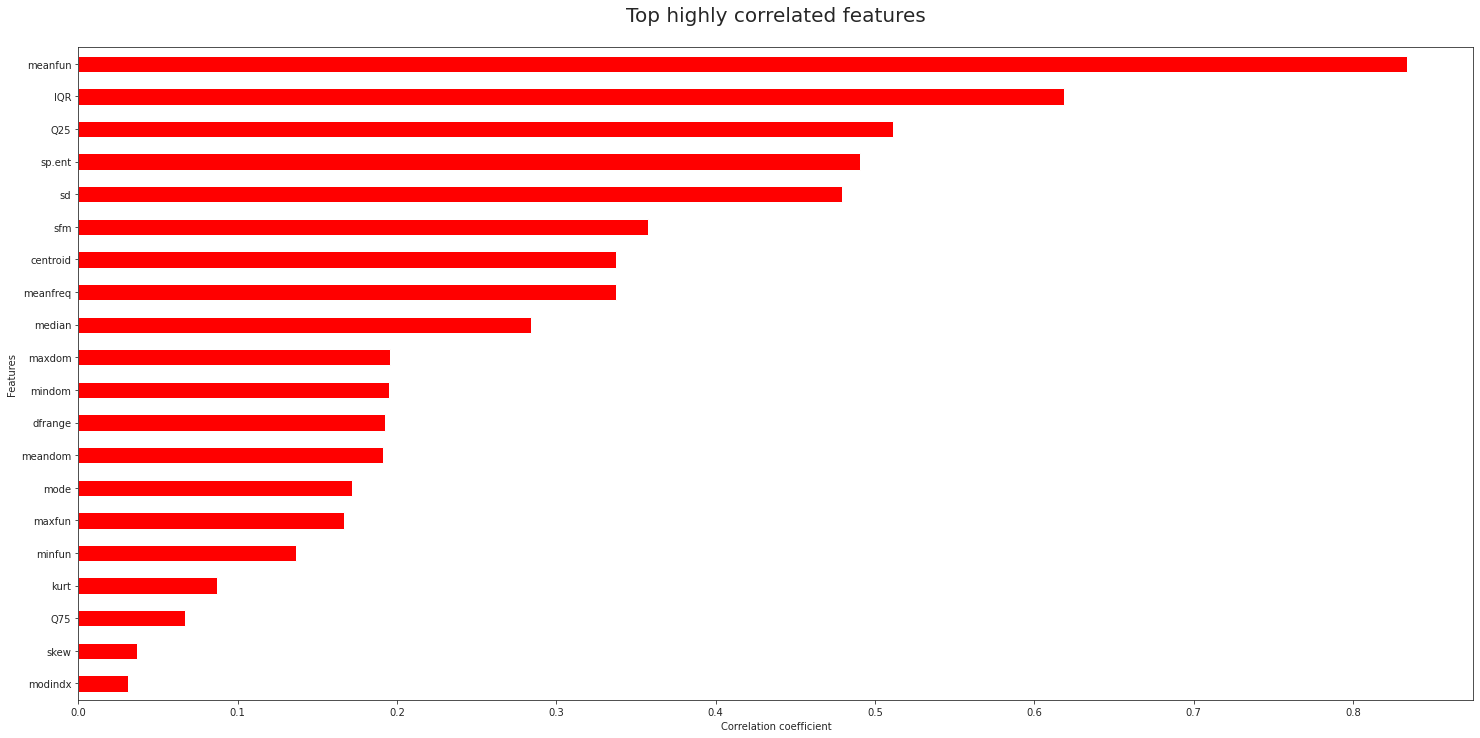

In [ ]:
selected_pixel_features = corr_data['label'].apply(lambda x: abs(x)).sort_values(ascending=False).iloc[1:21][::-1]
plt.figure(figsize=(25,12))
selected_pixel_features.plot(kind='barh',color='red')
# calculating highest correlated faetures
# with respect to target variable i.e. "convert"
plt.title("Top highly correlated features", size=20, pad=26)
plt.xlabel("Correlation coefficient")
plt.ylabel("Features")

**If we will set the threshold i.e. correlation coefficient >= 0.5. We got three feature's which are meanfun, IQR, Q25**

# **Selected Features :**

**Using Above Analysis(KDE Plot, Distance Plot & correlation coefficient) on Voice DataFrame, we got to know that there are three important features which are IQR, Q25, meanfun.**

In [ ]:
selected_features = ['IQR','Q25','meanfun']

In [ ]:
voice_df_X = voice_df[selected_features]
voice_df_y = voice_df.label

In [ ]:
voice_df_X.head()

,IQR,Q25,meanfun
0,0.075122,0.015071,0.084279
1,0.073252,0.019414,0.107937
2,0.123207,0.008701,0.098706
3,0.111374,0.096582,0.088965
4,0.127325,0.078720,0.106398


In [ ]:
voice_df_y.head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

# **Train-Test Splitting :**

In [ ]:
# Splitting voice_df into 70% and 30% to construct Training and Testing Data respectively.
trainX, testX, trainy, testy = train_test_split(voice_df_X, voice_df_y,test_size=0.3,random_state=14)

In [ ]:
trainX.shape

(2217, 3)

In [ ]:
trainX.head()

,IQR,Q25,meanfun
2653,0.036981,0.181824,0.173871
1414,0.095385,0.120513,0.131851
2234,0.106400,0.094267,0.159553
2656,0.038068,0.160286,0.162500
2534,0.045874,0.172961,0.156238


In [ ]:
trainy.shape

(2217,)

In [ ]:
trainy.head()

2653    0
1414    1
2234    0
2656    0
2534    0
Name: label, dtype: int64

In [ ]:
testX.shape

(951, 3)

In [ ]:
testX.head()

,IQR,Q25,meanfun
2249,0.060443,0.202251,0.129881
1811,0.046376,0.172787,0.169441
2073,0.136636,0.110758,0.151754
996,0.103019,0.132516,0.113175
132,0.079563,0.175015,0.124133


In [ ]:
testy.shape

(951,)

In [ ]:
testy.head()

2249    0
1811    0
2073    0
996     1
132     1
Name: label, dtype: int64

# **Optimizing Best Parameters for SVM Classifier :**

In [ ]:
def svm_kernel(trainX, trainy, testX, testy):
    rate=[]
    kernel=['rbf','poly','linear']
    for i in kernel:
        SVM_Model = SVC(kernel=i).fit(trainX,trainy)
        y_pred = SVM_Model.predict(trainX)
        print(i, 'Accuracy of Train Data : ', accuracy_score(trainy,y_pred))
        y_pred = SVM_Model.predict(testX)
        print(i, 'Accuracy of Test Data : ', accuracy_score(testy,y_pred))
        rate.append(accuracy_score(testy,y_pred))
    nloc = rate.index(max(rate))
    print("Highest accuracy is %s occurs at %s kernel." % (rate[nloc], kernel[nloc]))
    return kernel[nloc]

In [ ]:
def svm_error(k,C,x_train,y_train,x_test,y_test):
    error_rate = []
    C = range(1,C)
    for i in C:
        model = SVC(kernel=k,C=i).fit(x_train,y_train)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    cloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at C=%s." % (error_rate[cloc], C[cloc]))

    plt.plot(C, error_rate, color='red', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)
    plt.title('Error Rate Vs C Value')
    plt.xlabel('C')
    plt.ylabel('Error Rate')
    plt.show()
    return C[cloc]

In [ ]:
k = svm_kernel(trainX, trainy, testX, testy)

rbf Accuracy of Train Data :  0.970681100586378
rbf Accuracy of Test Data :  0.9737118822292324
poly Accuracy of Train Data :  0.9697789806044204
poly Accuracy of Test Data :  0.9716088328075709
linear Accuracy of Train Data :  0.914298601714028
linear Accuracy of Test Data :  0.9221871713985279
Highest accuracy is 0.9737118822292324 occurs at rbf kernel.


**Hence, RBF kernel is Selected for our final SVM Model.**

Lowest error is 0.023133543638275498 occurs at C=9.


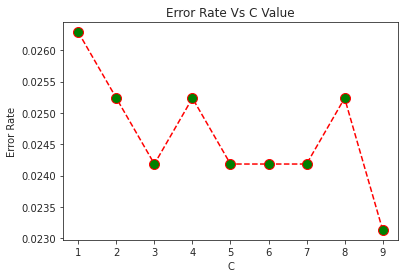

In [ ]:
c = svm_error(k, 10, trainX, trainy, testX, testy)

**Hence, Value of C is Selected as 9 for our final SVM Model.**

# **Applying Dimensionality Reduction :**

In [ ]:
# Initializing Principal Component Analysis(PCA)
PCA_method = PCA(n_components=2)

In [ ]:
# Fit And Transorm Data
traindf= PCA_method.fit_transform(trainX)
testdf = PCA_method.transform(testX)

# **Visualization :**

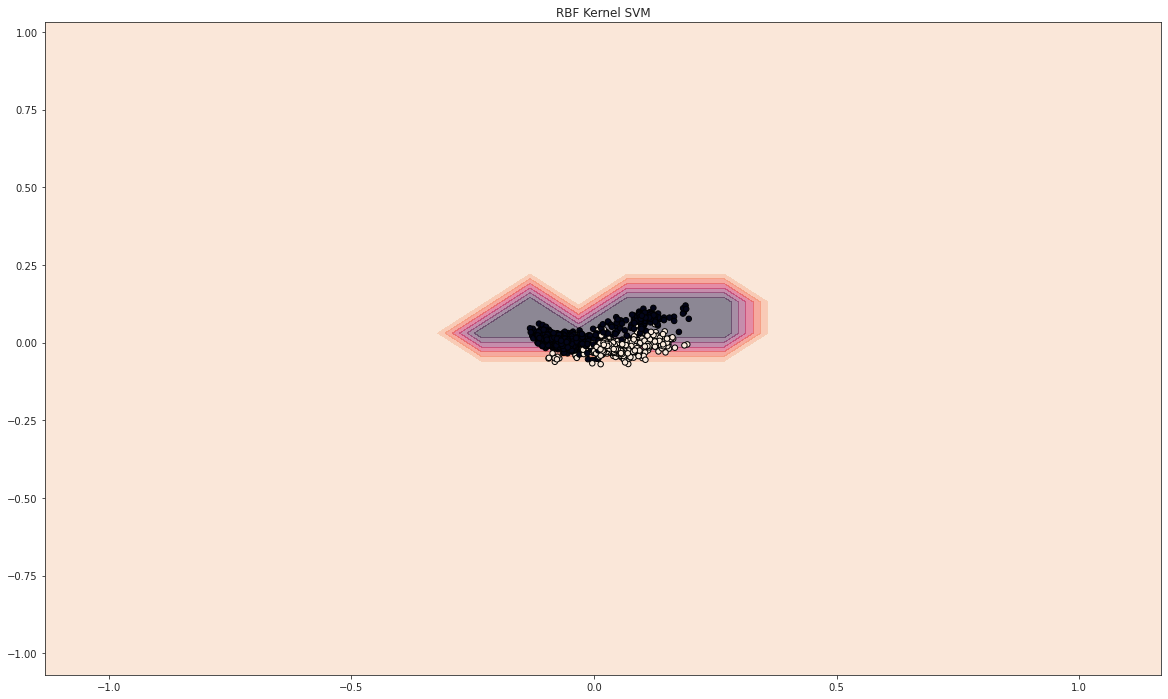

In [ ]:
# Plotting decision regions
x_min, x_max = traindf[:, 0].min() - 1, traindf[:, 0].max() + 1
y_min, y_max = traindf[:, 1].min() - 1, traindf[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

f, ax = plt.subplots(figsize=(20, 12))

SVM_Model = SVC(kernel=k, C=c).fit(traindf,trainy)

for clf, tt in zip([SVM_Model],['RBF Kernel SVM']):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.5)
    ax.scatter(traindf[:, 0], traindf[:, 1], c=trainy, s=30, edgecolor='k')
    ax.set_title(tt)
plt.show()

# **Creating Final SVM Classifier :**

In [ ]:
# Initailizing the Final SVM Classifier
Final_SVM_Model = SVC(kernel=k, C=c)
# Train the model using the training sets
Final_SVM_Model.fit(trainX, trainy)

SVC(C=9, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### **Perform Prediction on Training Data :**

In [ ]:
Final_SVM_Model_train_predictions = Final_SVM_Model.predict(trainX)

### **Perform Prediction on Testing Data :**

In [ ]:
Final_SVM_Model_test_predictions = Final_SVM_Model.predict(testX)

# **Evaluation**

### **On Training :**

In [ ]:
print("SVM Model Confusion Matrix:")
print(confusion_matrix(trainy, Final_SVM_Model_train_predictions))

print("SVM Model Classification Report")
print(classification_report(trainy, Final_SVM_Model_train_predictions))

SVM Model Confusion Matrix:
[[1106   25]
 [  32 1054]]
SVM Model Classification Report
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1131
           1       0.98      0.97      0.97      1086

    accuracy                           0.97      2217
   macro avg       0.97      0.97      0.97      2217
weighted avg       0.97      0.97      0.97      2217



### **On Testing :**

In [ ]:
print("SVM Model Confusion Matrix:")
print(confusion_matrix(testy, Final_SVM_Model_test_predictions))

print("SVM Model Classification Report")
print(classification_report(testy, Final_SVM_Model_test_predictions))

SVM Model Confusion Matrix:
[[440  13]
 [  9 489]]
SVM Model Classification Report
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       453
           1       0.97      0.98      0.98       498

    accuracy                           0.98       951
   macro avg       0.98      0.98      0.98       951
weighted avg       0.98      0.98      0.98       951



# **Predictions on Test Data :**

In [ ]:
OutputDF = pd.DataFrame({'Actual_label':testy,'Predicted_label':Final_SVM_Model_test_predictions})

In [ ]:
#Save to csv
OutputDF.to_csv('gender_pred.csv',index=False)
OutputDF.head()

,Actual_label,Predicted_label
2249,0,1
1811,0,0
2073,0,0
996,1,1
132,1,1


**Thank you**,<br>
Nikunj Bansal,<br>
R177218063,<br>
B2 Batch<br>